# OpenSBLI Benchmark: 1024^3 strong scaling, Taylor-Green vortex

This notebook compares the peformance of the 1024^3, strong scaling OpenSBLI Taylor-Green vortex benchmark on different systems.

Performance is given in iterations per second.

## Setup Section

In [14]:
import matplotlib as mpl
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,6)
import seaborn as sns
sns.set(font_scale=1.5, context="paper", style="white", font="serif")
pal = sns.color_palette()
cols = pal.as_hex()

In [15]:
import sys
sys.path.append('../../../python-modules')

In [16]:
from utilities import filemanip, sysinfo
from appanalysis import osbli
plotcores = True
unitlabel = "Nodes"
if plotcores:
    unitlabel = "Cores"

## Read data files

In [17]:
sysdetails = sysinfo.getdetails('../../../systems.yaml')

../../../python-modules/utilities/sysinfo.py:6: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  systems = yaml.load(input)


In [18]:
systems = ['ARCHER','Cirrus','Thomas','CSD3-Skylake','ARCHER2']
perf = {}
notes = {}
names = {}
nodes = {}
perf_max = {}
cpn = {}

for system in systems:
    wdir = '../TGV1024ss/results/' + system
    filelist = filemanip.get_filelist_ext(wdir, 'iter')
    sysdict = sysdetails[system]
    names[system] = sysdict['Name']
    cpn[system] = sysdict['PCores']*sysdict['PPerNode']
    print('\n============================================================')
    print(sysdict['Name'])
    osbli_df = pd.DataFrame(osbli.create_df_list(filelist, sysdict['PCores']*sysdict['PPerNode']))
    nodes[system], perf_max[system] = osbli.get_perf_stats(osbli_df, 'max', writestats=True, plotcores=plotcores)
    print('\n============================================================')


ARCHER
                         Perf                               Count
                          min    median       max      mean   sum
Nodes Cores Threads                                              
5     120   1        0.052917  0.052917  0.052917  0.052917     1
20    480   1        0.213463  0.213463  0.213463  0.213463     1
40    960   1        0.402617  0.402617  0.402617  0.402617     1
80    1920  1        0.505124  0.507136  0.509149  0.507136     2
160   3840  1        1.919198  1.919198  1.919198  1.919198     1
256   6144  1        2.737371  2.737371  2.737371  2.737371     1
384   9216  1        4.261812  4.261812  4.261812  4.261812     1
512   12288 1        5.542193  5.542193  5.542193  5.542193     1
640   15360 1        5.429589  5.429589  5.429589  5.429589     1
768   18432 1        7.923554  7.923554  7.923554  7.923554     1
896   21504 1        9.524172  9.524172  9.524172  9.524172     1


Cirrus
                         Perf                              

## Plot performance

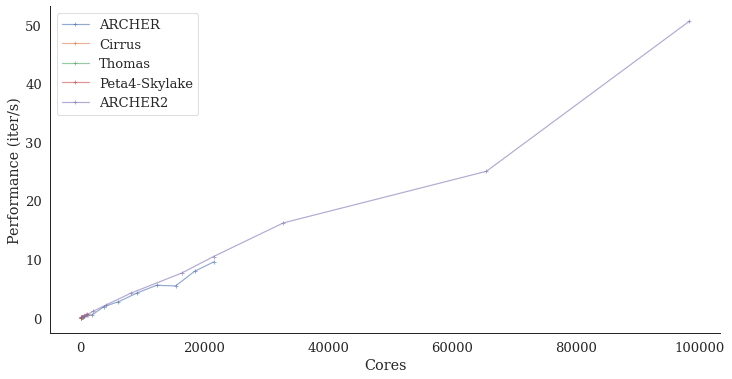

In [19]:
for system in systems:
    plt.plot(nodes[system], perf_max[system], '-+', label=names[system], alpha=0.6)
plt.xlabel(unitlabel)
plt.ylabel('Performance (iter/s)')
plt.legend(loc='best')
sns.despine()
plt.savefig("osbli_1024ss_perf.png")

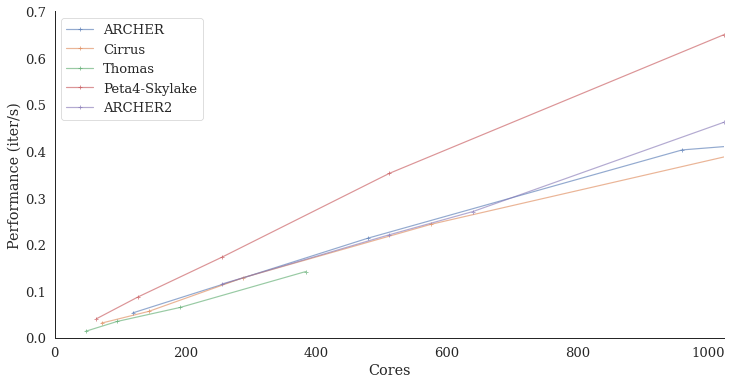

In [20]:
for system in systems:
    plt.plot(nodes[system], perf_max[system], '-+', label=names[system], alpha=0.6)
plt.xlabel(unitlabel)
plt.xlim([0,1024])
plt.ylim([0,0.7])
plt.ylabel('Performance (iter/s)')
plt.legend(loc='best')
sns.despine()

## ARCHER2 performance by thread count

Comparison of performance of MPI+OpenMP performance on ARCHER2 with different numbers of OpenMP threads per MPI process. In all cases, all physical cores on a node are used. For example, with 1 thread per MPI process, there are 128 MPI processes per node; with 8 threads per MPI process, there are 16 MPI processes per node.

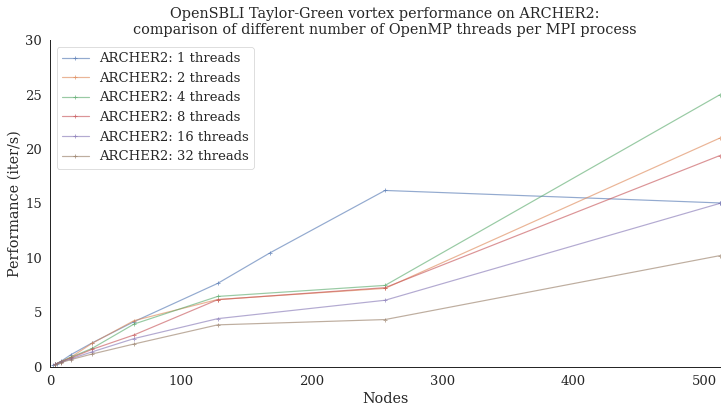

In [21]:
threadcount = [1, 2, 4, 8, 16, 32]
for threads in threadcount:
    nodes, perf_max = osbli.get_perf_stats(osbli_df, 'max', writestats=False, threads=threads)
    plt.plot(nodes, perf_max, '-+', label=f'ARCHER2: {threads} threads', alpha=0.6)

plt.title('OpenSBLI Taylor-Green vortex performance on ARCHER2:\ncomparison of different number of OpenMP threads per MPI process')
plt.xlabel('Nodes')
plt.xlim([0,512])
plt.ylim([0,30])
plt.ylabel('Performance (iter/s)')
plt.legend(loc='best')
sns.despine()
    

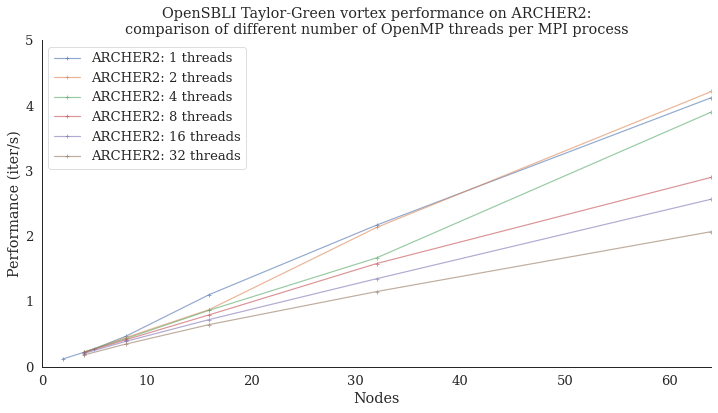

In [13]:
threadcount = [1, 2, 4, 8, 16, 32]
for threads in threadcount:
    nodes, perf_max = osbli.get_perf_stats(osbli_df, 'max', writestats=False, threads=threads)
    plt.plot(nodes, perf_max, '-+', label=f'ARCHER2: {threads} threads', alpha=0.6)

plt.title('OpenSBLI Taylor-Green vortex performance on ARCHER2:\ncomparison of different number of OpenMP threads per MPI process')
plt.xlabel('Nodes')
plt.xlim([0,64])
plt.ylim([0,5])
plt.ylabel('Performance (iter/s)')
plt.legend(loc='best')
sns.despine()